Single Linkage:
Iteration 1 - Distance Matrix (single linkage):
[[ 0.    1.41  2.   13.6   5.    8.   10.   14.42  8.    9.   10.   14.21
   8.25  9.22 10.2  15.   10.44  7.07  7.81 16.4   8.6   7.81  8.49  9.22
  12.65 13.6  13.   11.4  12.21]
 [ 1.41  0.    1.41 12.21  4.12  7.07  9.06 13.04  7.07  8.06  9.06 12.81
   7.07  8.06  9.06 13.6   9.22  5.66  6.4  15.    7.21  6.4   7.07  7.81
  11.4  12.37 11.7  10.   10.82]
 [ 2.    1.41  0.   12.04  3.    6.    8.   12.81  8.25  9.22 10.2  12.73
   8.    9.   10.   13.45 10.05  5.83  6.71 14.87  7.62  6.4   7.21  7.81
  10.77 11.7  11.18  9.9  10.63]
 [13.6  12.21 12.04  0.   10.    8.54  8.06  1.   11.   11.05 11.18  1.
   9.    9.06  9.22  1.41  8.25  6.71  6.32  2.83  6.08  5.83  5.39  4.47
   4.12  4.47  3.16  2.24  1.41]
 [ 5.    4.12  3.   10.    0.    3.    5.   10.63  9.43 10.3  11.18 10.82
   8.54  9.49 10.44 11.4  10.2   5.    6.   12.81  7.    5.1   6.08  6.32
   8.06  8.94  8.6   8.06  8.6 ]
 [ 8.    7.07  6.    8.54  3.    

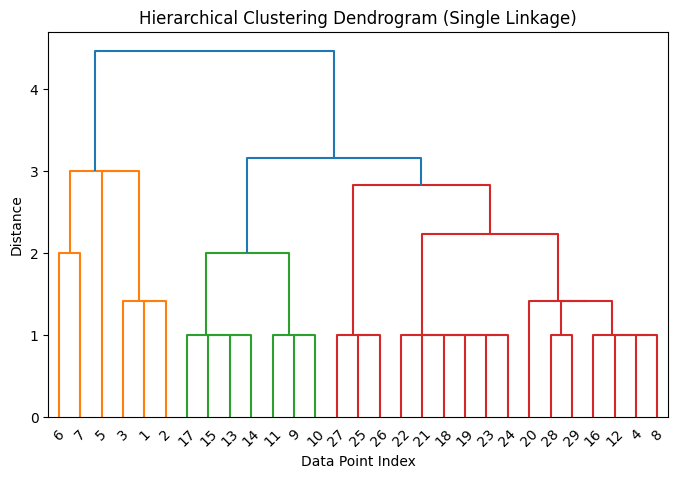


Dendrogram for Complete Linkage:


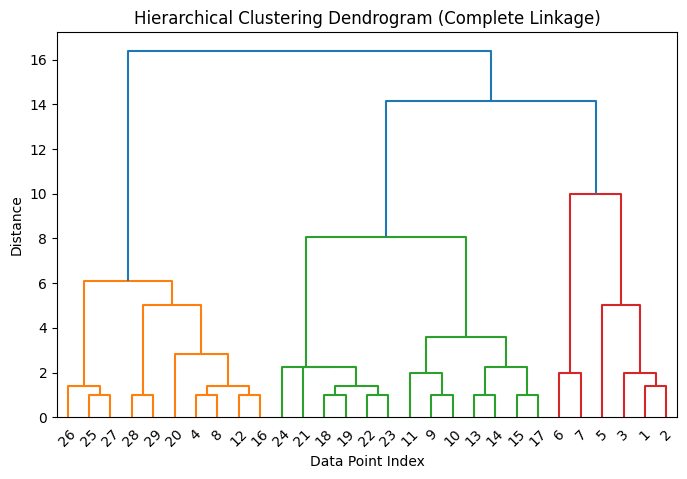


Dendrogram for Average Linkage:


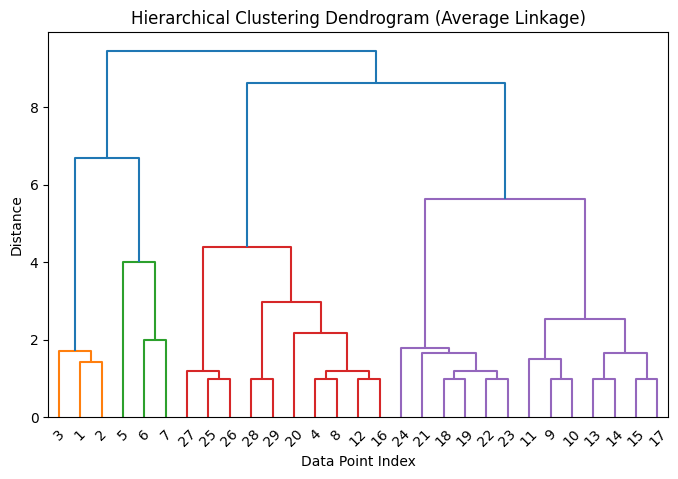


Dendrogram for Centroid Linkage:


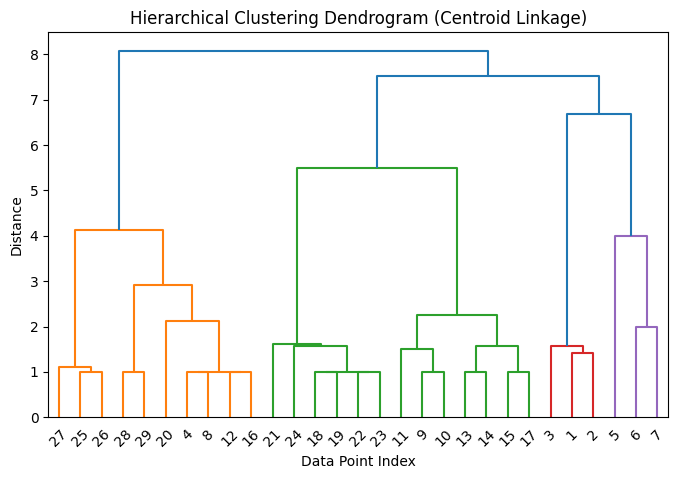

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Step 1: Define a function to compute Euclidean distance
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

# Step 2: Compute the centroid of a cluster
def compute_centroid(cluster):
    return np.mean(cluster, axis=0)

# Step 3: Create the distance matrix for clusters with different linkage methods
def compute_distance_matrix(clusters, linkage='single'):
    num_clusters = len(clusters)
    distance_matrix = np.zeros((num_clusters, num_clusters))
    
    for i in range(num_clusters):
        for j in range(i + 1, num_clusters):
            if linkage == 'single':
                min_distance = np.inf
                # Calculate minimum distance (single-linkage)
                for point1 in clusters[i]:
                    for point2 in clusters[j]:
                        dist = euclidean_distance(point1, point2)
                        if dist < min_distance:
                            min_distance = dist
                distance_matrix[i][j] = min_distance
                distance_matrix[j][i] = min_distance

            elif linkage == 'complete':
                max_distance = 0
                # Calculate maximum distance (complete-linkage)
                for point1 in clusters[i]:
                    for point2 in clusters[j]:
                        dist = euclidean_distance(point1, point2)
                        if dist > max_distance:
                            max_distance = dist
                distance_matrix[i][j] = max_distance
                distance_matrix[j][i] = max_distance

            elif linkage == 'average':
                distances = []
                # Calculate average distance (average-linkage)
                for point1 in clusters[i]:
                    for point2 in clusters[j]:
                        dist = euclidean_distance(point1, point2)
                        distances.append(dist)
                avg_distance = np.mean(distances)
                distance_matrix[i][j] = avg_distance
                distance_matrix[j][i] = avg_distance

            elif linkage == 'centroid':
                # Calculate centroid linkage (distance between centroids of clusters)
                centroid1 = compute_centroid(clusters[i])
                centroid2 = compute_centroid(clusters[j])
                centroid_distance = euclidean_distance(centroid1, centroid2)
                distance_matrix[i][j] = centroid_distance
                distance_matrix[j][i] = centroid_distance
    
    return distance_matrix

# Step 4: Merge two closest clusters
def find_closest_clusters(distance_matrix):
    min_dist = np.inf
    min_pair = (-1, -1)
    
    # Find the minimum non-zero distance in the matrix
    for i in range(len(distance_matrix)):
        for j in range(i + 1, len(distance_matrix)):
            if distance_matrix[i][j] < min_dist:
                min_dist = distance_matrix[i][j]
                min_pair = (i, j)
    
    return min_pair

# Step 5: Agglomerative clustering process with linkage type
def agglomerative_clustering(data, num_clusters, linkage='single'):
    clusters = [[point] for point in data]
    
    iteration = 1
    while len(clusters) > num_clusters:
        # Compute the distance matrix with specified linkage type
        distance_matrix = compute_distance_matrix(clusters, linkage=linkage)
        
        # Display the current distance matrix
        print(f"Iteration {iteration} - Distance Matrix ({linkage} linkage):")
        print(np.round(distance_matrix, 2))
        
        # Find the closest two clusters
        cluster1_idx, cluster2_idx = find_closest_clusters(distance_matrix)
        
        # Merge the closest clusters
        clusters[cluster1_idx].extend(clusters[cluster2_idx])
        clusters.pop(cluster2_idx)
        
        iteration += 1
    
    # Final distance matrix for the last cluster (should be all zeros)
    print("\nFinal Cluster Distance Matrix (All Zeros):")
    final_distance_matrix = compute_distance_matrix(clusters, linkage=linkage)
    print(np.round(final_distance_matrix, 2))
    
    return clusters

# Step 6: Create a dendrogram plot
def plot_dendrogram(data, method='single'):
    # Compute the linkage matrix
    Z = linkage(data, method=method)
    
    # Create a dendrogram plot
    plt.figure(figsize=(8, 5))
    dendrogram(Z, labels=np.arange(1, len(data) + 1))
    plt.title(f'Hierarchical Clustering Dendrogram ({method.capitalize()} Linkage)')
    plt.xlabel('Data Point Index')
    plt.ylabel('Distance')
    plt.show()

# Test the function
data = np.array([
    [1, 1], [2, 2], [3, 1], [12, 9], [6, 1], 
    [9, 1], [11, 1], [13, 9], [1, 9], [1, 10],
    [1, 11], [12, 10], [3, 9], [3, 10], [3, 11],
    [13, 10], [4, 11], [6, 6], [6, 7], [14, 11], 
    [6, 8], [7, 6], [7, 7], [8, 7], [13, 5],
    [14, 5], [13, 6], [10, 8], [11, 8]
]
)

# Perform clustering to find 1 cluster using different linkage types
print("Single Linkage:")
clusters_single = agglomerative_clustering(data, num_clusters=1, linkage='single')
print("\nComplete Linkage:")
clusters_complete = agglomerative_clustering(data, num_clusters=1, linkage='complete')
print("\nAverage Linkage:")
clusters_average = agglomerative_clustering(data, num_clusters=1, linkage='average')
print("\nCentroid Linkage:")
clusters_centroid = agglomerative_clustering(data, num_clusters=1, linkage='centroid')

# Step 7: Plot dendrogram for each linkage type
print("\nDendrogram for Single Linkage:")
plot_dendrogram(data, method='single')

print("\nDendrogram for Complete Linkage:")
plot_dendrogram(data, method='complete')

print("\nDendrogram for Average Linkage:")
plot_dendrogram(data, method='average')

print("\nDendrogram for Centroid Linkage:")
plot_dendrogram(data, method='centroid')
